In [18]:
from compute_trajectory import compute_trajectory
from compute_loss_surface import compute_loss_surface

2022-02-10 20:41:22,795 (private) matplotlib data path: /home/robby/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data
2022-02-10 20:41:22,797 matplotlib data path: /home/robby/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data
2022-02-10 20:41:22,804 CONFIGDIR=/home/robby/.config/matplotlib
2022-02-10 20:41:22,808 matplotlib version 3.3.2
2022-02-10 20:41:22,809 interactive is False
2022-02-10 20:41:22,810 platform is linux
2022-02-10 20:41:22,811 loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_frozen_importlib_external', '_io', 'marshal', 'posix', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib',

2022-02-10 20:41:22,864 CACHEDIR=/home/robby/.cache/matplotlib
2022-02-10 20:41:22,869 Using fontManager instance from /home/robby/.cache/matplotlib/fontlist-v330.json
2022-02-10 20:41:23,024 Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2022-02-10 20:41:23,029 Loaded backend module://ipykernel.pylab.backend_inline version unknown.
2022-02-10 20:41:23,164 Popen(['git', 'version'], cwd=/home/robby/repos/cs699_dynamics_of_representation_learning/loss_landscape, universal_newlines=False, shell=None, istream=None)
2022-02-10 20:41:23,177 Popen(['git', 'version'], cwd=/home/robby/repos/cs699_dynamics_of_representation_learning/loss_landscape, universal_newlines=False, shell=None, istream=None)


In [9]:
class Struct:
    def __init__(self, **entries):
        self.__dict__.update(entries)

In [44]:
v=1

## No Blur

In [17]:
run = 'i002_no-blur'
proj = 'buffer'

args = {
    'debug': True,
    'seed': 0,
    'result_folder': f'results/{run}/trajectories',
    'statefile_folder': f'results/{run}/ckpt',
    'model': 'resnet56',
    'direction_file': f'results/{run}/{proj}.npy.npz',
    'projection_file': f'{proj}_proj.npz',
    'remove_skip_connections': False,
    'skip_bn_bias': True
}
args = Struct(**args)

compute_trajectory(args)

2022-02-10 20:32:35,528 Setting seed to 0
2022-02-10 20:32:35,578 using resnet56 with 853018 parameters
2022-02-10 20:32:35,581 Found 201 models
2022-02-10 20:32:40,098 Dot product is 8.236384019255638e-09
2022-02-10 20:32:40,101 The directions are orthogonal
2022-02-10 20:32:40,137 Saving results
2022-02-10 20:32:40,139 xrange: -0.05391760915517807, 0.18104317784309387
2022-02-10 20:32:40,139 yrange: -0.07421281188726425, 0.14299359917640686


In [45]:
args = {
    'debug': True,
    'seed': 0,
    'batch_size': 1000,
    'result_folder': f'results/{run}/loss_surface_v{v}',
    'statefile': f'results/{run}/ckpt/200_model.pt',
    'model': 'resnet56',
    'surface_file': f'{proj}_loss_surface.npz',
    'direction_file': f'results/{run}/{proj}.npy.npz',
    'device': 'cuda:0',
    'remove_skip_connections': False,
    'skip_bn_bias': True,
    'xcoords': '21:-0.07:0.20',
    'ycoords': '21:-0.09:0.16'
}
args = Struct(**args)

compute_loss_surface(args)

2022-02-10 23:04:16,196 Setting seed to 0


Files already downloaded and verified
Files already downloaded and verified


2022-02-10 23:04:17,656 using resnet56 with 853018 parameters
2022-02-10 23:04:17,657 Loading model from results/i002_no-blur/ckpt/200_model.pt
2022-02-10 23:04:17,749 Loading directions from results/i002_no-blur/buffer.npy.npz
2022-02-10 23:04:17,764 x-range: -0.07:0.2:21
2022-02-10 23:04:17,766 y-range: -0.09:0.16:21
x: 0.2000, y: 0.1600, loss:0.0026: 100%|██████████| 441/441 [13:41<00:00,  1.86s/it]
2022-02-10 23:17:59,276 Saving results


In [22]:
import argparse
import logging
import os

import numpy
from matplotlib import pyplot

In [23]:
# python plot.py --result_folder figures/resnet56/ \
#     --trajectory_file results/resnet56_skip_bn_bias/trajectories/pca_dir_proj.npz \
#     --surface_file results/resnet56_skip_bn_bias/loss_surface/pca_dir_loss_surface.npz \
#     --plot_prefix resnet56_pca_dir

In [46]:
args = {
    'debug': True,
    'result_folder': f'figures/{run}',
    'surface_file': f'results/{run}/loss_surface_v{v}/{proj}_loss_surface.npz',
    'trajectory_file': f'results/{run}/trajectories/{proj}_proj.npz',
    'plot_prefix': f'{run}_{proj}',
    'remove_skip_connections': False,
}
args = Struct(**args)
os.makedirs(f"{args.result_folder}", exist_ok=True)

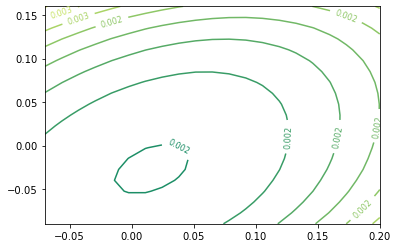

In [48]:
data = numpy.load(f"{args.surface_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
losses = data["losses"]
acc = data["accuracies"]

X, Y = numpy.meshgrid(xcoords, ycoords, indexing="ij")
Z = losses
fig = pyplot.figure()
# CS = pyplot.contour(X, Y, Z, cmap='summer', levels=numpy.arange(0.1, 10, 0.5))
CS = pyplot.contour(X, Y, Z, cmap='summer')

pyplot.clabel(CS, inline=1, fontsize=8)
fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_surface_2d_contour", dpi=300,
    bbox_inches='tight'
)
# pyplot.close()
pyplot.show()

2022-02-10 23:18:41,877 locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1d9c437310>
2022-02-10 23:18:41,878 Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f1d9c437310> on colorbar
2022-02-10 23:18:41,879 Setting pcolormesh


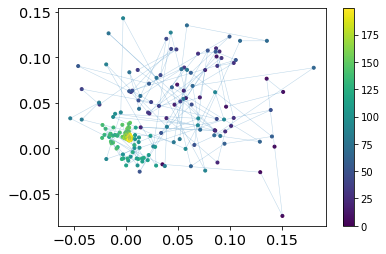

In [49]:
# create a 2D plot of trajectory
data = numpy.load(f"{args.trajectory_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]

fig = pyplot.figure()
pyplot.plot(xcoords, ycoords, linewidth=0.5, alpha=0.3)
pyplot.scatter(xcoords, ycoords, marker='.', c=numpy.arange(len(xcoords)))
pyplot.colorbar()
pyplot.tick_params('y', labelsize='x-large')
pyplot.tick_params('x', labelsize='x-large')

fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_trajectory_2d", dpi=300,
    bbox_inches='tight'
)
# pyplot.close()
pyplot.show()

2022-02-10 23:19:41,355 locator: <matplotlib.ticker.FixedLocator object at 0x7f1dc86d77c0>
2022-02-10 23:19:41,356 Using fixed locator on colorbar


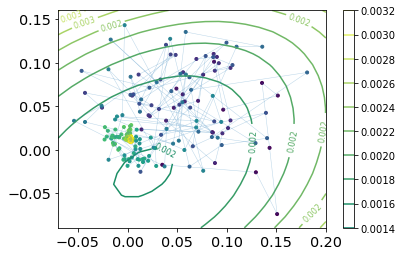

In [51]:
data = numpy.load(f"{args.surface_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
losses = data["losses"]
acc = data["accuracies"]

X, Y = numpy.meshgrid(xcoords, ycoords, indexing="ij")
Z = losses
fig = pyplot.figure()
# CS = pyplot.contour(X, Y, Z, cmap='summer', levels=numpy.arange(0.1, 10, 0.5))
CS = pyplot.contour(X, Y, Z, cmap='summer')


pyplot.clabel(CS, inline=1, fontsize=8)

data = numpy.load(f"{args.trajectory_file}")

xcoords = data["xcoordinates"]
ycoords = data["ycoordinates"]
pyplot.plot(xcoords, ycoords, linewidth=0.5, alpha=0.3)
pyplot.colorbar()
pyplot.scatter(xcoords, ycoords, marker='.', c=numpy.arange(len(xcoords)))
pyplot.tick_params('y', labelsize='x-large')
pyplot.tick_params('x', labelsize='x-large')
# pyplot.ylim((-1, 1))
# pyplot.xlim((-1, 1))


fig.savefig(
    f"{args.result_folder}/{args.plot_prefix}_trajectory+contour_2d", dpi=300,
    bbox_inches='tight'
)
pyplot.show()